In [55]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('fc_kp.csv')

In [26]:
df.shape

(22424, 55)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,kp_index_x3
0,2016-01-01 00:00:00,5.512677,-2.305265,-13.208849,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000
1,2016-01-01 00:00:00,5.512677,-2.305265,-13.208849,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000
2,2016-01-01 03:00:00,3.152941,-0.440106,-12.515978,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.333
3,2016-01-01 03:00:00,3.152941,-0.440106,-12.515978,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.333
4,2016-01-01 06:00:00,3.226364,-5.161290,-8.537423,143.819967,103.094027,126.3402,129.49592,124.643217,96.82823,...,131.601167,151.2143,144.231933,129.541733,147.492067,156.671133,137.356233,158.362867,144.435267,5.000


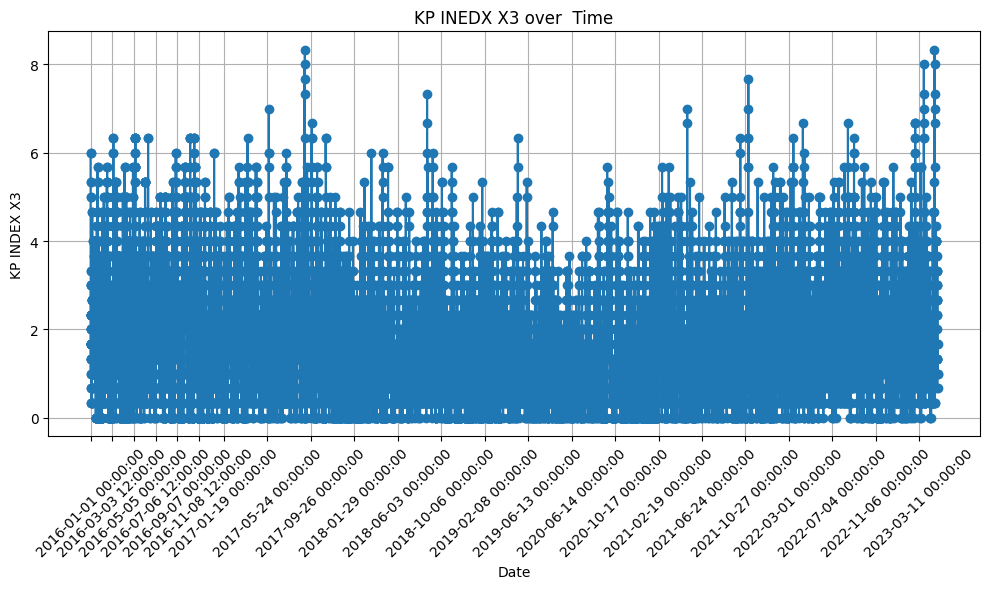

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(df.iloc[:, 0], df['kp_index_x3'], marker='o', linestyle='-')
plt.title('KP INEDX X3 over  Time')
plt.xlabel('Date')
plt.ylabel('KP INDEX X3')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.xticks(df.iloc[::1000, 0], rotation=45)

plt.tight_layout()

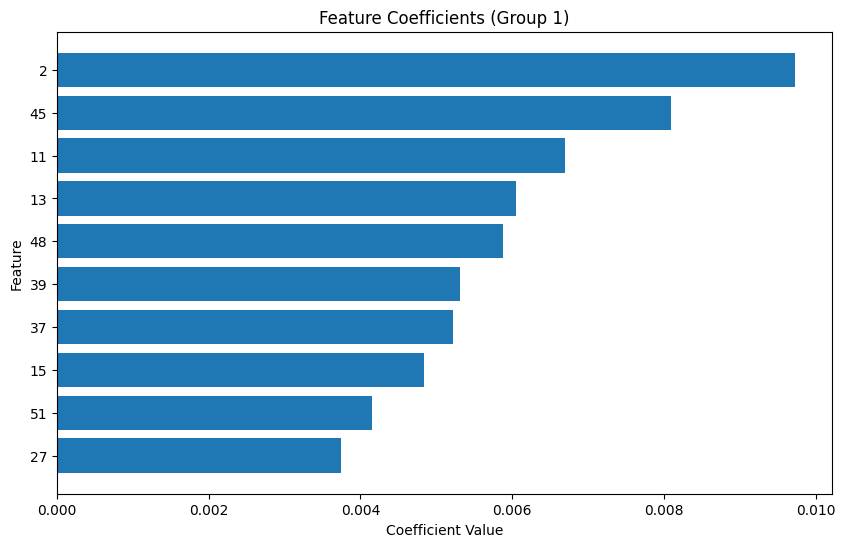

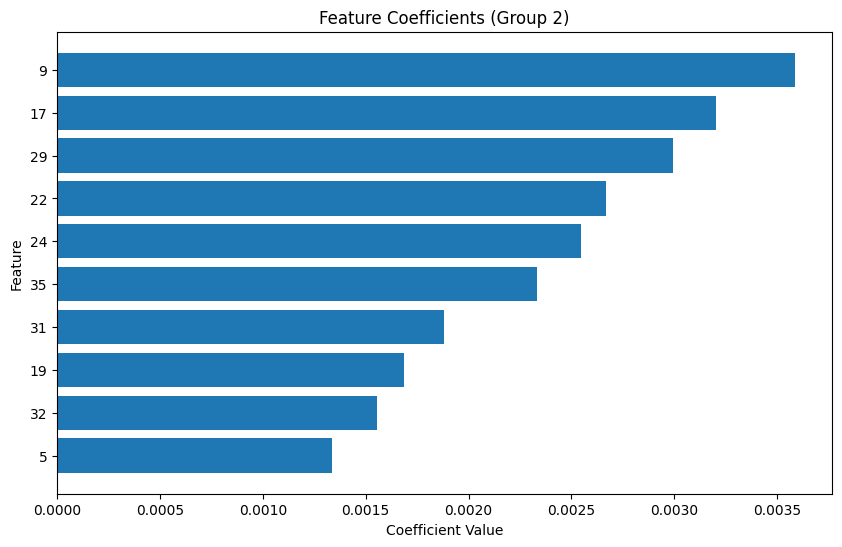

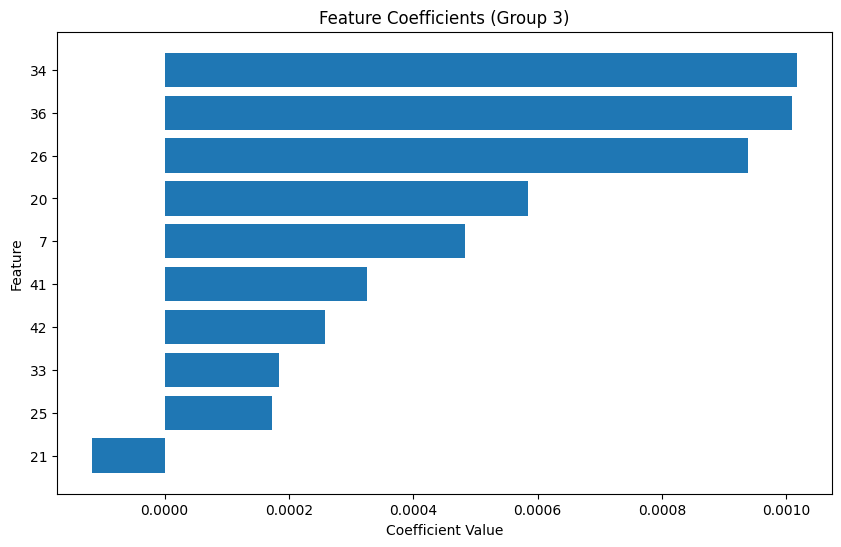

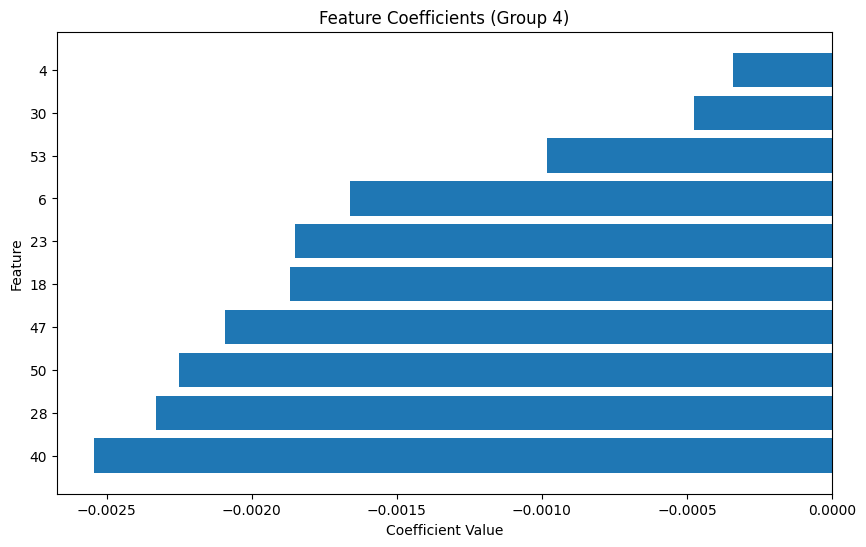

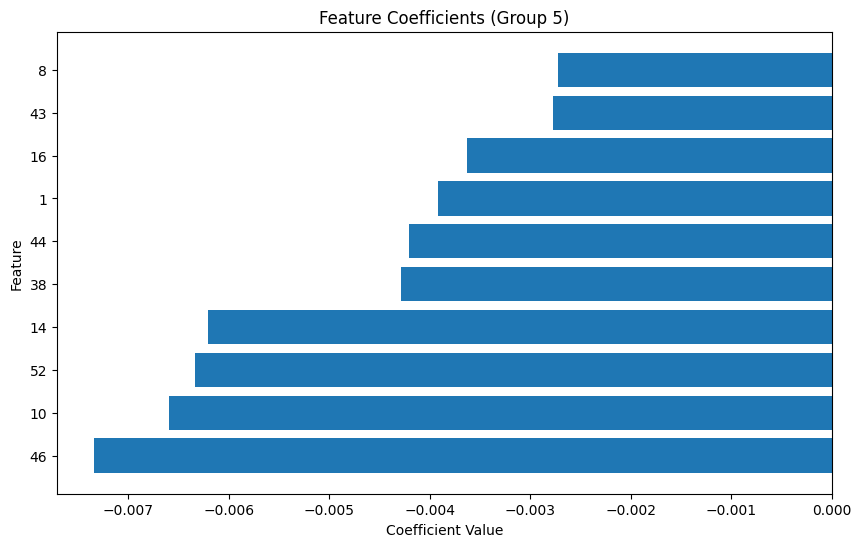

In [61]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and fit a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_imputed, y_train)

# Get the coefficients from the trained linear regression model
coefficients = linear_model.coef_

# Get the feature names
feature_names = X.columns

# Sort coefficients in descending order
sorted_indices = np.argsort(coefficients)[::-1]
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Split the feature names and coefficients into 5 groups for visualization
num_groups = 5  # Number of groups
group_size = len(sorted_feature_names) // num_groups

for i in range(num_groups):
    start_idx = i * group_size
    end_idx = (i + 1) * group_size
    group_feature_names = sorted_feature_names[start_idx:end_idx]
    group_coefficients = sorted_coefficients[start_idx:end_idx]

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(group_coefficients)), group_coefficients, align='center')
    plt.yticks(range(len(group_coefficients)), group_feature_names)
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title(f'Feature Coefficients (Group {i + 1})')
    plt.gca().invert_yaxis()  # Invert the y-axis to display most important features at the top
    plt.show()


In [76]:
df.shape

(22424, 55)

In [95]:
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming 'df' contains your dataset with features and target variable

# Extract features (excluding the target variable) and target variable
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and fit a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_imputed, y_train)

# Get the coefficients from the trained linear regression model
coefficients = linear_model.coef_

# Get the feature names
feature_names = X.columns

# Sort coefficients in descending order
sorted_indices = np.argsort(coefficients)[::-1]
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Create a list of features with non-positive coefficients
negative_features = [feature for feature, coef in zip(sorted_feature_names, sorted_coefficients) if coef <= 0]

#negative_features = [int(feature) for feature in negative_features]
new_df = df.drop(negative_features, axis=1)

In [86]:
print(negative_features)

[21, 4, 30, 53, 6, 23, 18, 47, 50, 28, 40, 8, 43, 16, 1, 44, 38, 14, 52, 10, 46, 49, 12, 3]


In [96]:
new_df.head()

,0,2,5,7,9,11,13,15,17,19,...,35,36,37,39,41,42,45,48,51,kp_index_x3
0,2016-01-01 00:00:00,-2.305265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000
1,2016-01-01 00:00:00,-2.305265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000
2,2016-01-01 03:00:00,-0.440106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.333
3,2016-01-01 03:00:00,-0.440106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.333
4,2016-01-01 06:00:00,-5.161290,103.094027,129.49592,96.82823,93.431337,41.13171,10.061243,26.99365,107.8463,...,153.443367,162.5916,146.986433,165.239333,151.9641,162.5418,131.601167,129.541733,137.356233,5.000


In [97]:
len(new_df.columns)

31

In [98]:
X_features = new_df.iloc[:, 1:-1]
X_features

,2,5,7,9,11,13,15,17,19,20,...,34,35,36,37,39,41,42,45,48,51
0,-2.305265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-2.305265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.440106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.440106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-5.161290,103.094027,129.495920,96.828230,93.431337,41.131710,10.061243,26.993650,107.846300,143.468267,...,159.018433,153.443367,162.591600,146.986433,165.239333,151.9641,162.5418,131.601167,129.541733,137.356233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22419,-0.139294,0.231726,0.231726,0.231726,0.231726,0.345056,90.791293,157.609733,212.009033,316.518011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22420,0.916831,0.231726,0.231726,0.231726,0.231726,0.245677,92.086238,159.160967,212.624522,317.814867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22421,0.604107,0.231726,0.238706,0.231726,0.233523,0.547290,96.487587,164.613089,215.856922,318.070611,...,335.713613,267.855290,305.104655,212.636862,NaN,NaN,NaN,NaN,NaN,NaN
22422,2.938294,0.231726,16.074486,0.231726,0.231726,27.283789,67.415578,187.981689,255.662433,292.802922,...,334.458467,302.594167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
X_features = new_df.iloc[:, 1:-1]
y = new_df.iloc[:, -1]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_features) 

scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X_imputed) 

In [122]:
X_scaled.shape

(22424, 29)

In [123]:
y.shape

(22424,)

In [130]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled,y, test_size=0.3, random_state=42)  
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  

trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
testX = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
valX = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

In [129]:
X_val.shape

(3364, 29)

In [125]:
X_train.shape

(15696, 29)

In [134]:
model = Sequential()
model.add(LSTM(64, input_shape=(1, 29)))
model.add(Dense(1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, y_train, epochs=30, batch_size=5, verbose=2)


Epoch 1/30
3140/3140 - 15s - loss: 1.0508 - 15s/epoch - 5ms/step
Epoch 2/30
3140/3140 - 11s - loss: 0.9215 - 11s/epoch - 4ms/step
Epoch 3/30
3140/3140 - 11s - loss: 0.8883 - 11s/epoch - 3ms/step
Epoch 4/30
3140/3140 - 11s - loss: 0.8656 - 11s/epoch - 4ms/step
Epoch 5/30
3140/3140 - 11s - loss: 0.8489 - 11s/epoch - 4ms/step
Epoch 6/30
3140/3140 - 11s - loss: 0.8364 - 11s/epoch - 4ms/step
Epoch 7/30
3140/3140 - 12s - loss: 0.8229 - 12s/epoch - 4ms/step
Epoch 8/30
3140/3140 - 11s - loss: 0.8157 - 11s/epoch - 3ms/step
Epoch 9/30
3140/3140 - 10s - loss: 0.8083 - 10s/epoch - 3ms/step
Epoch 10/30
3140/3140 - 10s - loss: 0.7995 - 10s/epoch - 3ms/step
Epoch 11/30
3140/3140 - 11s - loss: 0.7927 - 11s/epoch - 3ms/step
Epoch 12/30
3140/3140 - 11s - loss: 0.7872 - 11s/epoch - 3ms/step
Epoch 13/30
3140/3140 - 11s - loss: 0.7826 - 11s/epoch - 3ms/step
Epoch 14/30
3140/3140 - 10s - loss: 0.7745 - 10s/epoch - 3ms/step
Epoch 15/30
3140/3140 - 10s - loss: 0.7694 - 10s/epoch - 3ms/step
Epoch 16/30
3140/31

In [135]:
y_pred = model.predict(testX)

106/106 [==============================] - 1s 3ms/step


In [136]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = math.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r_squared = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r_squared:.2f}")


Mean Absolute Error (MAE): 0.69
Mean Squared Error (MSE): 0.79
Root Mean Squared Error (RMSE): 0.89
R-squared (R2): 0.48


# PREVIOUSLY

In [4]:

X = df.drop('kp_index_x3', axis=1)  
X = X.select_dtypes(include=['number'])

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X) 

scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X_imputed) 

n_components = 2

tsne = TSNE(n_components=n_components, random_state=42)

X_embedded = tsne.fit_transform(X_scaled)

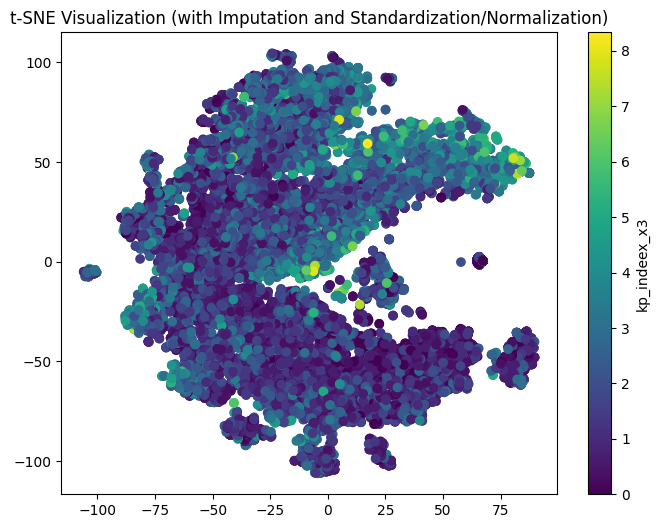

In [5]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=df['kp_index_x3'], cmap='viridis')
plt.title('t-SNE Visualization (with Imputation and Standardization/Normalization)')
color_bar = plt.colorbar(scatter)
color_bar.set_label('kp_indeex_x3')
plt.show()

In [6]:
y = df['kp_index_x3']

In [7]:
y

0        6.000
1        6.000
2        5.333
3        5.333
4        5.000
         ...  
22419    2.667
22420    1.000
22421    1.000
22422    1.667
22423    0.667
Name: kp_index_x3, Length: 22424, dtype: float64

In [8]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled,y, test_size=0.3, random_state=42)  
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  
X_train.shape

(15696, 53)

In [28]:
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
testX = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [34]:
trainX.shape

(15696, 1, 53)

In [36]:
y_test.shape

(3364,)

In [45]:
trainX

array([[[-1.72777094e-02, -1.41703555e-01,  1.51740894e+00, ...,
         -2.12955220e-15, -4.19009023e-15,  0.00000000e+00]],

       [[ 8.21400822e-02, -9.76050690e-01, -2.61985340e+00, ...,
         -2.12955220e-15, -4.19009023e-15,  0.00000000e+00]],

       [[ 1.21031196e+00, -8.39799621e-02,  7.65847658e-01, ...,
         -2.12955220e-15, -4.19009023e-15,  0.00000000e+00]],

       ...,

       [[-9.01383937e-01,  4.36600394e-01, -1.11504433e-01, ...,
         -2.12955220e-15, -4.19009023e-15,  0.00000000e+00]],

       [[-4.72571099e-18,  4.34330275e-18,  0.00000000e+00, ...,
         -2.12955220e-15, -4.19009023e-15,  0.00000000e+00]],

       [[-7.55569109e-01,  1.09473894e+00, -5.91827320e-01, ...,
         -2.12955220e-15, -4.19009023e-15,  0.00000000e+00]]])

In [31]:
model = Sequential()
model.add(LSTM(64, input_shape=(1, 53)))
model.add(Dense(1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
15696/15696 - 60s - loss: 0.8696 - 60s/epoch - 4ms/step
Epoch 2/100
15696/15696 - 56s - loss: 0.7284 - 56s/epoch - 4ms/step
Epoch 3/100
15696/15696 - 56s - loss: 0.6975 - 56s/epoch - 4ms/step
Epoch 4/100
15696/15696 - 55s - loss: 0.6758 - 55s/epoch - 3ms/step
Epoch 5/100
15696/15696 - 46s - loss: 0.6616 - 46s/epoch - 3ms/step
Epoch 6/100
15696/15696 - 48s - loss: 0.6485 - 48s/epoch - 3ms/step
Epoch 7/100
15696/15696 - 48s - loss: 0.6391 - 48s/epoch - 3ms/step
Epoch 8/100
15696/15696 - 48s - loss: 0.6273 - 48s/epoch - 3ms/step
Epoch 9/100
15696/15696 - 48s - loss: 0.6206 - 48s/epoch - 3ms/step
Epoch 10/100
15696/15696 - 58s - loss: 0.6102 - 58s/epoch - 4ms/step
Epoch 11/100
15696/15696 - 45s - loss: 0.6047 - 45s/epoch - 3ms/step
Epoch 12/100
15696/15696 - 47s - loss: 0.5966 - 47s/epoch - 3ms/step
Epoch 13/100
15696/15696 - 66s - loss: 0.5914 - 66s/epoch - 4ms/step
Epoch 14/100
15696/15696 - 55s - loss: 0.5822 - 55s/epoch - 4ms/step
Epoch 15/100
15696/15696 - 55s - loss: 0.57

ValueError: in user code:

    File "c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2042, in test_function  *
        return step_function(self, iterator)
    File "c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2025, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2013, in run_step  **
        outputs = model.test_step(data)
    File "c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1893, in test_step
        y_pred = self(x, training=False)
    File "c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 1, 53), found shape=(None, 53)


In [48]:
model.evaluate(testX, y_test)

106/106 [==============================] - 0s 3ms/step - loss: 0.7808


0.7808443307876587

In [50]:
y_train.shape

(15696,)

In [52]:
y_pred = model.predict(testX)

106/106 [==============================] - 2s 3ms/step


In [53]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = math.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r_squared = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r_squared:.2f}")


Mean Absolute Error (MAE): 0.66
Mean Squared Error (MSE): 0.78
Root Mean Squared Error (RMSE): 0.88
R-squared (R2): 0.49
